# Introduction

### Business problem overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the top business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

# Problem Statement

The telecom company in Southeast Asia is facing an increase in customer churn and wants to reduce the loss of high-value customers. They aim to predict churn in the ninth month using data from the previous three months. The company plans to analyze various factors such as demographics, usage patterns, service quality, and complaints to identify variables that affect churn. They will focus on high-value customers and build machine learning models for churn prediction. These models will help predict churn likelihood and identify important variables to address underlying issues and improve customer satisfaction.

These models will serve two purposes.

*   First, they will predict whether a high-value customer is likely to churn in
the near future. By gaining insights into this aspect, the company can take proactive steps such as offering special plans, discounts, or personalized offers to retain these customers.
*   Second, the models will identify important variables that strongly predict churn. These variables will shed light on why customers choose to switch to other networks, enabling the company to address underlying issues and improve customer satisfaction.





# Tasks Involved

**Task 1: Import libraries and load the dataset**

**Task 2: Understand and explore the data**
*   Analyze different feature types in the data
*   Handle missing values by imputation
*   Identify the relevant data required for the problem

**Task 3: Conduct feature engineering**
*   Extract new relevant features from the data set
*   Filter high-value customers
*   Derive the target variable “churn” based on the existing features

**Task 4: Visualize the data**
*   Analyze the data to extract relevant insights through informative visualizations
*   Look for any outliers and treat them

**Task 5: Modeling**
*   Divide the data into train-test splits
*   Handle class imbalance
*   Build different machine learning models and evaluate their performance
*   Tune the hyperparameters to optimize the performance for the best model
*   Train and evaluate a neural network model with the optimal combination of hyperparameters

**Task 6: Business insights and recommendations**
*   Understand the profitability of the telecommunication service program, and estimate the impact of your model using misclassification costs
*   Propose a solution to leverage customer interaction/feedback data and predict those who are highly likely to churn

# Task 1: Importing the required libraries and loading the data set

**Description**


In this task, you will load all the methods and packages required to perform the various tasks in this capstone project.

First, import the required packages and modules.

In [318]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

Mount Google Drive to your VM.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Import the training data

In [210]:
# Read the training data from a CSV file stored in your Google Drive
#churn = pd.read_csv('/content/drive/MyDrive/telecom_churn_data.csv')

In [319]:
# read the data"C:\Users\pc\Desktop\shivangee upgrad\Capstone 2\telecom_churn_data.csv"
churn = pd.read_csv('/Users/pc/Desktop/shivangee upgrad/Capstone 2/telecom_churn_data.csv')

In [320]:
churn

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252

Checklist:


*   Imported the required packages
*   Mounted your Google Drive to access the data
*   Imported the data


# Task 2: Understanding and exploring the data

### Description

In this task, you will explore the data that you have just loaded.

In [321]:
# look at initial rows of the data
churn.head(10)

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252

### Data Description

There are several types of data that is collected from customers by a telecomminucation service provider. Some of the information that you have to look for data analysis and EDA is given below:
- Recharging of the service: There are several variables that describe the duration, maximum, total amount and average of the recharge price of the service they avail, which include the 2G service, the 3G service, internet packages and call services
  - av_rech_amt_data: Average recharge data amount
  - count_rech_2g: Count of 2G recharges by the customer
  - count_rech_3g: Count of 3G recharges by the customer
  - max_rech_data: Maximum recharge for mobile internet
  - total_rech_data: Total recharge for mobile internet
  - max_rech_amt: Maximum recharge amount
  - total_rech_amt: Total recharge amount
  - total_rech_num: Total number of times customer recharged

- Call and Internet service: They specify the amount of calls, type of calling service used (STD, ISD, Roaming), type of internet service and amount of internet usage over a specific period of time
  - total_calls_mou: Total minutes of voice calls
  - total_internet_mb: Total amount of internet usage in MB
  - arpu: Average revenue per user
  - onnet_mou: The minutes of usage for all kind of calls within the same operator network
  - offnet_mou: The minutes of usage for all kind of calls outside the operator T network
  - Minutes of usage for outgoing calls for each type of call service:
    - loc_og_mou
    - std_og_mou
    - isd_og_mou
    - spl_og_mou
    - roam_og_mou
    - total_og_mou
  - Minutes of usage for incoming calls for each type of call service:
    - loc_ic_mou
    - std_ic_mou
    - isd_ic_mou
    - spl_ic_mou
    - roam_ic_mou
    - total_ic_mou
  - total_rech_num: Total number of recharge
  - total_rech_amt: Total amount of recharge
  - max_rech_amt: Maximum recharge amount
  - total_rech_data: Total recharge for mobile internet
  - max_rech_data: Maximum recharge for mobile internet
  - av_rech_amt_data: Average recharge amount for mobile internet
  - vol_2g_mb: Mobile internet usage volumn for 2G
  - vol_3g_mb: Mobile internet usage volumn for 3G


The categorical variables present in the data set are given below:
  - night_pck_user: Prepaid service schemes for use during specific night hours only
  - fb_user: Service scheme to avail services of Facebook and similar social networking sites



Most of the variables have their values recorded for 4 different months. The variable names end with the month number as explained below:
- *.6: KPI for the month of June
- *.7: KPI for the month of July
- *.8: KPI for the month of August
- *.9: KPI for the month of September

The rest of variables have been defined in the detailed data description.

Print information about the dataframe

In [322]:
# summary of different feature types
churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 225 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    circle_id                 int64  
 1    loc_og_t2o_mou            float64
 2    std_og_t2o_mou            float64
 3    loc_ic_t2o_mou            float64
 4    last_date_of_month_6      object 
 5    last_date_of_month_7      object 
 6    last_date_of_month_8      object 
 7    last_date_of_month_9      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   arpu_9                    float64
 12   onnet_mou_6               float64
 13   onnet_mou_7               float64
 14   onnet_mou_8               float64
 15   onnet_mou_9               float64
 16   offnet_mou_6              float64
 17   offnet_mou_7              float64
 18   offnet_mou_8              float64
 19   offnet_mou_9              float64
 20   roam

Display the summary statistics for the data set

In [323]:
# analysis of data statistics
churn.describe(include='all')

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0000

Create a copy of the original data

In [324]:
# create backup of data
original = churn.copy()

Analyze the different types of features present in the data set

In [325]:
# create column name list by types of columns
id_cols = ['circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in churn.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == churn.shape[1])

#ID cols: 1
#Date cols:12
#Numeric cols:204
#Category cols:8
True


# Handling missing values

### Details on Missing Values

There are several types of features present in this data set. Some of the information that you have to look for missing value treatment is given below:


*   If there are missing values in the columns corresponding to 'Recharging of the service' variables, this is because the customer did not recharge that month.


*   If the columns corresponding to 'Call and Internet service' variables that have more than 70% of missing values, you can drop those variables from the data set. If not, then you can use the MICE technique to impute the values in those missing entries.


*   If there are missing values in the categorical variables, this means that there is another scheme that the customer has availed from the telecomminucation service.

Find the ratio of missing values in each column in the data set

In [326]:
# look at missing value ratio in each column

(churn.isnull().sum()*100/churn.shape[0]).sort_values(ascending=False)

arpu_3g_6                   74.846748
av_rech_amt_data_6          74.846748
fb_user_6                   74.846748
night_pck_user_6            74.846748
total_rech_data_6           74.846748
max_rech_data_6             74.846748
count_rech_2g_6             74.846748
count_rech_3g_6             74.846748
date_of_last_rech_data_6    74.846748
arpu_2g_6                   74.846748
av_rech_amt_data_7          74.428744
date_of_last_rech_data_7    74.428744
max_rech_data_7             74.428744
total_rech_data_7           74.428744
arpu_3g_7                   74.428744
fb_user_7                   74.428744
count_rech_3g_7             74.428744
arpu_2g_7                   74.428744
night_pck_user_7            74.428744
count_rech_2g_7             74.428744
arpu_3g_9                   74.077741
max_rech_data_9             74.077741
date_of_last_rech_data_9    74.077741
total_rech_data_9           74.077741
arpu_2g_9                   74.077741
count_rech_2g_9             74.077741
night_pck_us

**Checkpoint:** You must have observed that there are 40 features with more than 70% of the missing values.

### i) Impute missing values with zeroes

Now that we have the information about the amount of missing values in each column, we can go ahead and perform some imputing and deleting.

First, we will start with the columns corresponding to the "recharging of the service" information.

In [327]:
# Display summary statistics for the recharge columns
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

churn[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000



Observe whether the date of the last recharge and the total recharge data value are missing together

In [328]:
# You can do this by displaying the rows that have null values in these two variables

churn.loc[churn.total_rech_data_6.isnull() & churn.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


Impute missing values with zeroes wherever customer didn't recharge their number that month.

In [329]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [330]:
# impute missing values with 0 for the above mentioned list of recharge columns

churn[zero_impute] = churn[zero_impute].apply(lambda x: x.fillna(0))

Check whether the imputation has been done correctly

In [331]:
# now, let's make sure values are imputed correctly
print("Missing value ratio:\n")
print(churn[zero_impute].isnull().sum()*100/churn.shape[1])

# summary
print("\n\nSummary statistics\n")
print(churn[zero_impute].describe(include='all'))

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


Summary statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  av_rech_

Drop the id and date columns which are not required in further analyses

In [332]:
# drop id and all the date columns
print("Shape before dropping: ", churn.shape)
churn = churn.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", churn.shape)

Shape before dropping:  (99999, 225)
Shape after dropping:  (99999, 212)


### ii) Replace NaN values in categorical variables

The categorical variables present in the data set are given below:
  - night_pck_user: Prepaid service schemes for use during specific night hours only
  - fb_user: Service scheme to avail services of Facebook and similar social networking sites

If there are missing values, this means that there is another scheme that the customer has availed from the telecomminucation service.

We will replace missing values in the categorical values with '-1' where '-1' will be a new category.

In [333]:
# replace missing values with '-1' in categorical columns

churn[cat_cols] = churn[cat_cols].apply(lambda x: x.fillna(-1))

Check for the missing value ratio

In [334]:
# missing value ratio
print("Missing value ratio:\n")
print(churn[cat_cols].isnull().sum()*100/churn.shape[0])

Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


### iii) Drop variables with more than a given threshold of missing values

Here, we will be removing the column variables that have more than 70% of its elements missing.

In [335]:
initial_cols = churn.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(churn.apply(lambda column: True if column.isnull().sum()/churn.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':churn.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,arpu_9,True
7,onnet_mou_6,True
8,onnet_mou_7,True
9,onnet_mou_8,True


In [336]:
# Include the columns extracted in the above list in the main data set
# These columns will have the percentage of missing values less than the threshold

# Display the number of columns dropped

# drop columns
churn = churn.loc[:, include_cols]

dropped_cols =  initial_cols - churn.shape[1]
print("{0} columns dropped.".format(dropped_cols))

16 columns dropped.


**Checkpoint:** You must have dropped 16 columns in the above step

In [337]:
# look at missing value ratio in each column
churn.isnull().sum()*100/churn.shape[0]

loc_og_t2o_mou        1.018010
std_og_t2o_mou        1.018010
loc_ic_t2o_mou        1.018010
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
arpu_9                0.000000
onnet_mou_6           3.937039
onnet_mou_7           3.859039
onnet_mou_8           5.378054
onnet_mou_9           7.745077
offnet_mou_6          3.937039
offnet_mou_7          3.859039
offnet_mou_8          5.378054
offnet_mou_9          7.745077
roam_ic_mou_6         3.937039
roam_ic_mou_7         3.859039
roam_ic_mou_8         5.378054
roam_ic_mou_9         7.745077
roam_og_mou_6         3.937039
roam_og_mou_7         3.859039
roam_og_mou_8         5.378054
roam_og_mou_9         7.745077
loc_og_t2t_mou_6      3.937039
loc_og_t2t_mou_7      3.859039
loc_og_t2t_mou_8      5.378054
loc_og_t2t_mou_9      7.745077
loc_og_t2m_mou_6      3.937039
loc_og_t2m_mou_7      3.859039
loc_og_t2m_mou_8      5.378054
loc_og_t2m_mou_9      7.745077
loc_og_t2f_mou_6      3.937039
loc_og_t

### iv) Impute missing values using MICE

[MICE](https://scikit-learn.org/stable/modules/impute.html) is called "Multiple Imputation by Chained Equation". It uses machine learning techniques in order to see what are the trends in the values of that column. Using this information, it will smartly fill in the missing values in that column.

MICE is now called Iterative Imputer.

You can specify the machine learning algorithm to be used in order to fill in the missing values of that column.

In [338]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from fancyimpute import IterativeImputer
from sklearn.linear_model import LinearRegression

So, we will be using linear regression for filling the missing values in the rest of the numeric columns.

In [339]:
churn_cols = churn.columns

# using MICE technique to impute missing values in the rest of the columns
# Implement the Iterative Imputer technique to impute appropriate values in the missing entries of the rest of the numeric columns
# Note: Set the 'estimator' parameter to 'lr'  - This specifies that we will be using linear regression to estimate the missing values
# Note: Set the 'missing_values' parameter to 'np.nan' - This specifies that we have impute the entries which are NaNs
# Note: Set the 'max_iter' parameter to '1' - This specifies the number of iterations the algorithm scans through the data set
#       to converge to appropriate values it is going to impute in the missing entries. It takes around 6 min to run.
# Note: Set the 'verbose' parameter to '2' - This specifies the amount of details it will show while imputing
# Note: Set the 'imputation_order' parameter to 'roman' - This specifies the order in which features will be imputed. 'roman' means left to right
# Note: Set the 'random_state' parameter to '0' - This is for reproducibility

imputer = IterativeImputer(max_iter=1, random_state=0)
churn_imputed = pd.DataFrame(imputer.fit_transform(churn), columns=churn.columns)

In [340]:
churn_imputed

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,-45.250105,-16.899187,0.000000,-32.993711,186.579533,174.678586,0.000000,172.450085,30.86802,22.270114,0.000000,23.044344,13.631635,5.005073,0.000000,3.488020,41.292193,27.898121,0.000000,35.266755,93.308559,91.382426,0.000000,90.396676,3.785214,3.803148,0.000000,3.703467,-7.796032,-14.549868,0.000000,-10.628545,5.382288,-11.957243,0.000000,-21.027157,92.411446,94.034359,0.000000,94.688516,87.155512,90.608616,0.000000,86.346147,1.191893,1.180798,0.000000,1.057599,0.0,0.0,0.0,0.0,120.949622,126.924155,0.000000,121.989483,-115.851992,-103.888592,0.000000,-98.274230,3.91359,4.975648,0.000000,4.408388,0.447541,0.044681,0.000000,0.047577,0.00,0.00,0.00,0.00,53.06306,40.911488,0.160000,58.647020,107.484204,107.117221,4.130000,106.174799,12.073331,12.592421,1.150000,12.162925,66.228074,59.272123,5.440000,64.663544,23.290485,19.713324,0.000000,25.879730,20.715897,21.653738,0.000000,19.61674,2.161704,2.219742,0.000000,2.175474,0.0,0.0,0.0,0.0,0.468532,0.530814,0.000000,0.046185,0.00,0.00,5.44,0.00,-66.974986,-65.568727,0.000000,-66.969160,7.807359,8.248139,0.000000,8.080696

In [341]:
# convert imputed numpy array to pandas dataframe
churn = pd.DataFrame(churn_imputed, columns=churn_cols)
print(churn.isnull().sum()*100/churn.shape[0])

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

You can now see that we have removed or filled all the missing values from the data set.

### Checklist
- Explored the data set by analyzing the summary statistics
- Identified the types of features present in the data set
- Computed the ratio of missing values in each of the features in the data set
- Imputed missing values with zeroes wherever customer didn't recharge their number for any particular month
- Replace missing values in the categorical variables with '-1' where '-1' is a new category
- Removed the column variables that have more than 70% of its elements missing
- Imputed the remaining  features with missing values using MICE technique
- Retained the data set required for further analyses by dropping the irrelevant columns


We will now proceed to feature engineering to further prepare the data for testing machine learning and deep learning models.

# Task 3: Feature engineering

### Description

In this task, you will extract, select, or create relevant features from your dataset.

### Filter high-value customers
High-value customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

### Calculate total data recharge amount

In [342]:
# calculate and store the total data recharge amount for June --> number of data recharges * average data recharge amount
# You have to use the total recharge for data and the average recharge amount for data
# June, July, August and September - The months are encoded as 6, 7, 8 and 9, respectively.
churn['total_data_rech_6'] = churn.total_rech_data_6 * churn.av_rech_amt_data_6

# calculate and store the total data recharge amount for July --> number of data recharges * average data recharge amount
churn['total_data_rech_7'] = churn.total_rech_data_7 * churn.av_rech_amt_data_7

Add total data recharge and call recharge to get total combined recharge amount for a month

In [343]:
# calculate and store total recharge amount for call and internet data for June --> total call recharge amount + total data recharge amount
churn['amt_data_6'] = churn.total_rech_amt_6 + churn.total_data_rech_6
churn['amt_data_7'] = churn.total_rech_amt_7 + churn.total_data_rech_7

# calculate and store total recharge amount for call and internet data for July --> total call recharge amount + total data recharge amount


Compute the average recharge amount for customers in June and July

In [344]:
# calculate average data recharge amount done by customer in June and July
churn['av_amt_data_6_7'] = (churn.amt_data_6 + churn.amt_data_7)/2

Find the 70th percentile for average data recharge amount for June and July

In [345]:
# evaluate and display the 70th percentile average data recharge amount of June and July
print("Recharge amount at 70th percentile: {0}".format(churn.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


**Checkpoint:** You must have obtained 478 as the recharge amount at 70th percentile.

Filter the data set for customers who have recharged their mobiles with more than or equal to 70th percentile amount

In [346]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
# You have seen whether each customer row has the average data recharge amount more than the 70th percentile of the average data recharge amount
churn_filtered = churn.loc[churn.av_amt_data_6_7 >= churn.av_amt_data_6_7.quantile(0.7), :]
churn_filtered = churn_filtered.reset_index(drop=True)
churn_filtered.shape

(30001, 201)

Drop the variables which are no longer required

In [347]:
# delete variables created to filter high-value customers
churn_filtered = churn_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)

In [348]:
# Display the number of customers retained in the data set
churn_filtered.shape

(30001, 196)

**Checkpoint:** Now you must have 30001 customers in the data set with 196 columns.

### Derive churn

### Tagging churners and removing the attributes of the churn phase
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: those who have not made any calls (either incoming or outgoing) and have not used mobile internet even once in the churn phase. The attributes you must use to tag churners are as follows:

total_ic_mou_9
total_og_mou_9
vol_2g_mb_9
vol_3g_mb_9
After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having “_9”, etc. in their names).

Calculate total incoming and outgoing minutes of usage for the month of September

In [349]:
# Add total incoming and outgoing minutes of usage for the month of September
churn_filtered['total_calls_mou_9'] = churn_filtered.total_ic_mou_9 + churn_filtered.total_og_mou_9

Calculate the total volumn of 2g and 3g data consumption for the month of September

In [350]:
# Add the total volumn of 2g and 3g data consumption for the month of September
churn_filtered['total_internet_mb_9'] =  churn_filtered.vol_2g_mb_9 + churn_filtered.vol_3g_mb_9

Create churn variable by tagging customers who have not used either calls or internet in the month of September as 0 - not churn and 1 - churn otherwise

In [351]:
# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned using the lambda function
# Here 0 denotes not churn and 1 denotes churn
churn_filtered['churn'] = churn_filtered.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

Drop the derived variables which are no longer required

In [352]:
# delete derived variables
churn_filtered = churn_filtered.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

Analyze the class ratio of churn column

In [353]:
# change the 'churn' variable data type to 'category'
churn_filtered.churn = churn_filtered.churn.astype("category")
# print churn ratio
print("Churn Ratio:")
print(churn_filtered.churn.value_counts()*100/churn_filtered.shape[0])

Churn Ratio:
churn
0    91.863605
1     8.136395
Name: count, dtype: float64


### Calculate difference between 8th and previous months

Let's derive some variables. The most important feature, in this situation, can be the difference between the 8th month and the previous months. The difference can be in patterns such as usage difference or recharge value difference. Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [354]:
cols =  ['arpu',
         'onnet_mou',
         'offnet_mou',
         'roam_ic_mou',
         'roam_og_mou',
         'loc_og_mou',
         'std_og_mou',
         'isd_og_mou',
         'spl_og_mou',
         'total_og_mou',
         'loc_ic_mou',
         'std_ic_mou',
         'isd_ic_mou',
         'spl_ic_mou',
         'total_ic_mou',
         'total_rech_num',
         'total_rech_amt',
         'max_rech_amt',
         'total_rech_data',
         'max_rech_data',
         'av_rech_amt_data',
         'vol_2g_mb',
         'vol_3g_mb'
         ]

# Create new columns that hold the value of the difference between the variable value
# in the month of August and average of the variable values in the month of June and July

In [355]:
churn_filtered['arpu_diff'] = churn_filtered.arpu_8 - ((churn_filtered.arpu_6 + churn_filtered.arpu_7)/2)

churn_filtered['onnet_mou_diff'] = churn_filtered.onnet_mou_8 - ((churn_filtered.onnet_mou_6 + churn_filtered.onnet_mou_7)/2)

churn_filtered['offnet_mou_diff'] = churn_filtered.offnet_mou_8 - ((churn_filtered.offnet_mou_6 + churn_filtered.offnet_mou_7)/2)

churn_filtered['roam_ic_mou_diff'] = churn_filtered.roam_ic_mou_8 - ((churn_filtered.roam_ic_mou_6 + churn_filtered.roam_ic_mou_7)/2)

churn_filtered['roam_og_mou_diff'] = churn_filtered.roam_og_mou_8 - ((churn_filtered.roam_og_mou_6 + churn_filtered.roam_og_mou_7)/2)

churn_filtered['loc_og_mou_diff'] = churn_filtered.loc_og_mou_8 - ((churn_filtered.loc_og_mou_6 + churn_filtered.loc_og_mou_7)/2)

churn_filtered['std_og_mou_diff'] = churn_filtered.std_og_mou_8 - ((churn_filtered.std_og_mou_6 + churn_filtered.std_og_mou_7)/2)

churn_filtered['isd_og_mou_diff'] = churn_filtered.isd_og_mou_8 - ((churn_filtered.isd_og_mou_6 + churn_filtered.isd_og_mou_7)/2)

churn_filtered['spl_og_mou_diff'] = churn_filtered.spl_og_mou_8 - ((churn_filtered.spl_og_mou_6 + churn_filtered.spl_og_mou_7)/2)

churn_filtered['total_og_mou_diff'] = churn_filtered.total_og_mou_8 - ((churn_filtered.total_og_mou_6 + churn_filtered.total_og_mou_7)/2)

churn_filtered['loc_ic_mou_diff'] = churn_filtered.loc_ic_mou_8 - ((churn_filtered.loc_ic_mou_6 + churn_filtered.loc_ic_mou_7)/2)

churn_filtered['std_ic_mou_diff'] = churn_filtered.std_ic_mou_8 - ((churn_filtered.std_ic_mou_6 + churn_filtered.std_ic_mou_7)/2)

churn_filtered['isd_ic_mou_diff'] = churn_filtered.isd_ic_mou_8 - ((churn_filtered.isd_ic_mou_6 + churn_filtered.isd_ic_mou_7)/2)

churn_filtered['spl_ic_mou_diff'] = churn_filtered.spl_ic_mou_8 - ((churn_filtered.spl_ic_mou_6 + churn_filtered.spl_ic_mou_7)/2)

churn_filtered['total_ic_mou_diff'] = churn_filtered.total_ic_mou_8 - ((churn_filtered.total_ic_mou_6 + churn_filtered.total_ic_mou_7)/2)

churn_filtered['total_rech_num_diff'] = churn_filtered.total_rech_num_8 - ((churn_filtered.total_rech_num_6 + churn_filtered.total_rech_num_7)/2)

churn_filtered['total_rech_amt_diff'] = churn_filtered.total_rech_amt_8 - ((churn_filtered.total_rech_amt_6 + churn_filtered.total_rech_amt_7)/2)

churn_filtered['max_rech_amt_diff'] = churn_filtered.max_rech_amt_8 - ((churn_filtered.max_rech_amt_6 + churn_filtered.max_rech_amt_7)/2)

churn_filtered['total_rech_data_diff'] = churn_filtered.total_rech_data_8 - ((churn_filtered.total_rech_data_6 + churn_filtered.total_rech_data_7)/2)

churn_filtered['max_rech_data_diff'] = churn_filtered.max_rech_data_8 - ((churn_filtered.max_rech_data_6 + churn_filtered.max_rech_data_7)/2)

churn_filtered['av_rech_amt_data_diff'] = churn_filtered.av_rech_amt_data_8 - ((churn_filtered.av_rech_amt_data_6 + churn_filtered.av_rech_amt_data_7)/2)

churn_filtered['vol_2g_mb_diff'] = churn_filtered.vol_2g_mb_8 - ((churn_filtered.vol_2g_mb_6 + churn_filtered.vol_2g_mb_7)/2)

churn_filtered['vol_3g_mb_diff'] = churn_filtered.vol_3g_mb_8 - ((churn_filtered.vol_3g_mb_6 + churn_filtered.vol_3g_mb_7)/2)

In [356]:
# let's look at summary of one of the difference variables
# The variable mentioned below is the total outgoing calls minutes of usage difference between the total OG MOU in August and average of the total OG MOU of June and July

churn_filtered['total_og_mou_diff'].describe()

count    30001.000000
mean       -67.437337
std        502.630069
min      -7213.410000
25%       -168.025000
50%        -14.625000
75%         67.915000
max      12768.705000
Name: total_og_mou_diff, dtype: float64

Delete columns that belong to the churn month (9th month)

In [357]:
# delete all variables relating to 9th month
churn_filtered = churn_filtered.filter(regex='[^9]$', axis=1)
churn_filtered.shape

(30001, 173)

In [358]:
# update num_cols and cat_cols column name list
col_9_names = churn.filter(regex='9$', axis=1).columns
# update num_cols and cat_cols column name list
cat_cols = [col for col in cat_cols if col not in col_9_names]
cat_cols.append('churn')
num_cols = [col for col in churn_filtered.columns if col not in cat_cols]

### Checklist:
- Extracted high-value customers by filtering those customers who have recharged with an amount more than or equal to the 70th percentile of the average recharge amount in the first two months (the good phase).
- Dropped the variables created to filter hight value customers
- Created the churn variable by tagging customers who have not used either calls or internet in the month of September as 0 - not churn and 1 - churn otherwise
- Derived new features by calculating the total outgoing calls minutes of usage difference between the total OG MOU in August and average of the total OG MOU of June and July
- Removed the variables related to the churn phase

# Task 4: Data Visualization

### Description:
In this task, you will visually represent and interpret patterns, trends, and relationships within the features in your dataset.

Check the data types of the numerical and categorical columns in the data set

Create a function to do the univariate and bivariate analysis of the features present in the data set

In [359]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'

def univariate(variable, stats=True):

    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())

    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())

    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2, dff):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(x=var1, y=var2, data=dff)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):
        sns.boxplot(x=var1, y=var2, data=dff)

## Univariate EDA

count    99999.000000
mean       282.987358
std        328.439770
min      -2258.709000
25%         93.411500
50%        197.704000
75%        371.060000
max      27731.088000
Name: arpu_6, dtype: float64


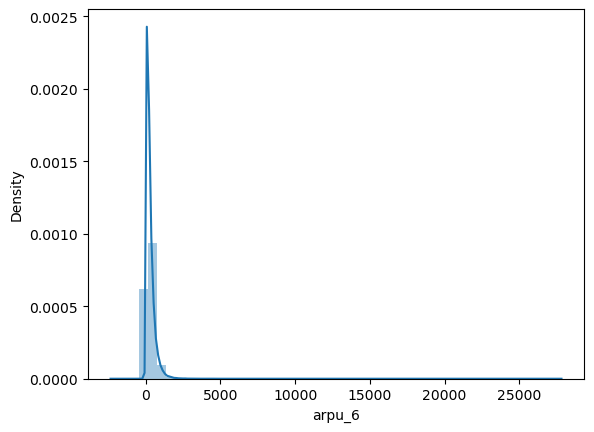

In [360]:
# Plot the average revenue per user in June
univariate(churn.arpu_6)

count    99999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


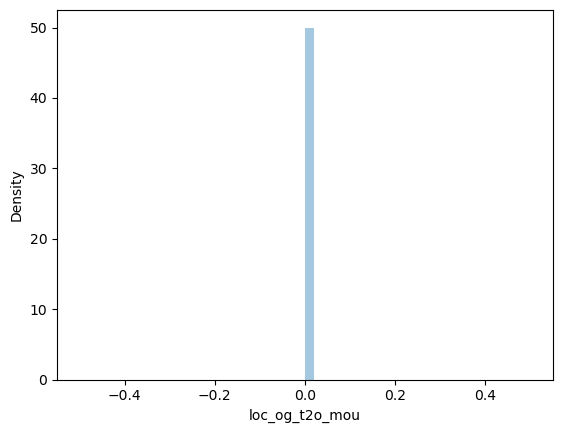

In [361]:
# Plot the minutes of usage of local (within same telecom circle) outgoing calls of Operator T to other operator fixed line
univariate(churn.loc_og_t2o_mou)

count    99999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64


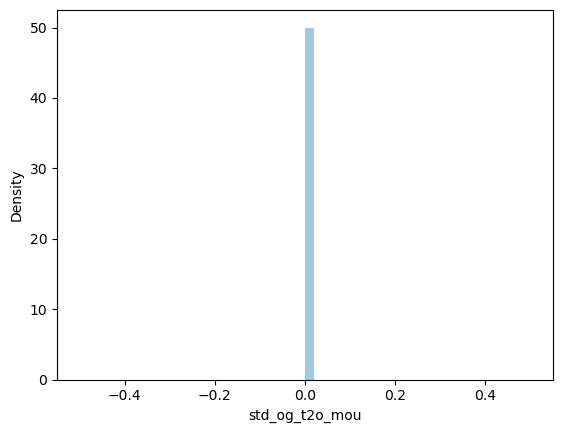

In [362]:
# Plot the minutes of usage of STD (outside the calling circle) outgoing calls of Operator T to other operator fixed line
univariate(churn.std_og_t2o_mou)

count    99999.000000
mean       123.486482
std        303.181229
min       -506.208268
25%          4.090000
50%         28.040000
75%        106.740000
max      10752.560000
Name: onnet_mou_8, dtype: float64


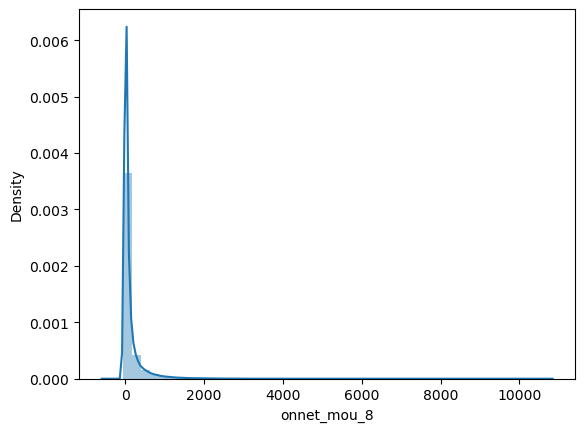

In [363]:
# Plot the minutes of usage of all kind of calls within the same operator network for the month of August
univariate(churn.onnet_mou_8)

count    99999.000000
mean       188.971600
std        306.814291
min          0.000000
25%         31.230000
50%        101.290000
75%        202.835000
max      10310.760000
Name: offnet_mou_9, dtype: float64


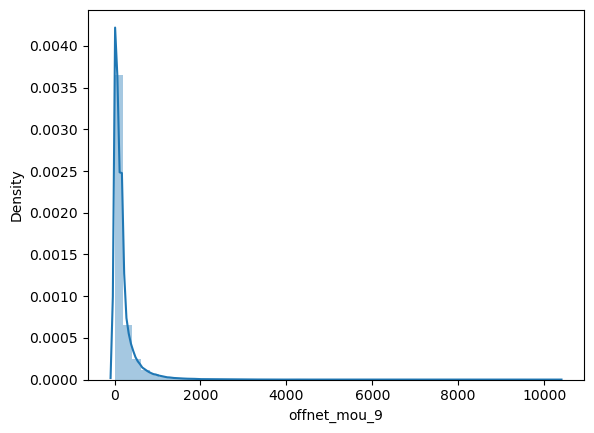

In [364]:
# Plot the minutes of usage of all kind of calls outside the operator T network for the month of September
univariate(churn.offnet_mou_9)

## Bivariate EDA

Now visualize and analyse the relationship between different features in the data set

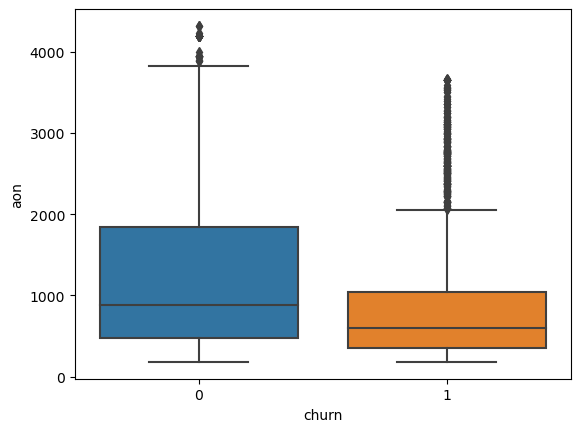

In [365]:
# Plot the relationship between different variables present in the data set
bivariate(churn_filtered.churn, churn_filtered.aon, churn_filtered)

### Cap outliers in all numeric variables

Create a function to deal with outliers using the IQR method

In [366]:
pd.crosstab(churn_filtered.churn, churn_filtered.night_pck_user_8, normalize='columns')*100

night_pck_user_8,-1.0,0.0,1.0
churn,,,
0,85.89123,97.117602,97.360704
1,14.10877,2.882398,2.639296


In [367]:
pd.crosstab(churn_filtered.churn, churn_filtered.sachet_3g_8)

sachet_3g_8,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,23.0,25.0,27.0,29.0,30.0,38.0,41.0
churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,24972,1609,399,184,106,86,43,35,28,19,15,8,11,10,6,6,2,2,3,1,3,3,2,1,1,1,2,1,1
1,2369,48,5,8,4,2,1,0,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [368]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

The following is an example to help you understand how capping is done to treat outliers

In [369]:
# example of capping
sample_array = list(range(100))

# add outliers to the data
sample_array[0] = -9999
sample_array[99] = 9999

# cap outliers
sample_array = np.array(sample_array)
print("Array after capping outliers: \n", cap_outliers(sample_array))

Array after capping outliers: 
 [-4194     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    70    71
    72    73    74    75    76    77    78    79    80    81    82    83
    84    85    86    87    88    89    90    91    92    93    94    95
    96    97    98  4291]


Use the outlier capping function to cap the outliers present in all the numeric columns in the data set

In [370]:
# cap outliers in all the numeric columns using your outlier capping function
churn_filtered[num_cols] = churn_filtered[num_cols].apply(cap_outliers, axis=0)

**Checklist:**
- Created functions to carry out univariate and bivariate analysis of the columns in the data set
- Capped outliers by creating a function and applying it on all the numerical features

# Task 5: Modeling

### Description:
In this task, you will train and evaluate predictive models using your prepared dataset.

## i) Importing necessary libraries for machine learning and deep learning

In [371]:
#algorithms for sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

#baseline linear model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#modules for hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#modules for model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import precision_score, accuracy_score, f1_score, r2_score
from sklearn.metrics import precision_recall_curve, roc_curve

# Import methods for building neural networks
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

# Import 'KerasClassifier' from 'keras' for connecting neural networks with 'sklearn' and 'GridSearchCV'
#from keras.wrappers.scikit_learn import KerasClassifier

## ii) Preprocessing data

In [372]:
# change churn to numeric
churn_filtered['churn'] = pd.to_numeric(churn_filtered['churn'])

In [373]:
# Extract input and output data
X = churn_filtered.drop("churn", axis = 1)
y = churn_filtered.churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22500, 172), (7501, 172), (22500,), (7501,))

Create dummy variables for the categorical features

In [374]:
# Use dummy variables for categorical variables
X =  pd.get_dummies(X)

In [375]:
X_train

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
4525,0.0,0.0,0.0,222.318,0.600,183.004000,3.93,0.00,0.000000,4.09,0.16,15.460000,0.00,0.00,0.00000,0.00,0.00,0.000000,0.36,0.00,0.000000,0.960000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,1.33,0.00,0.000000,3.56,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.0,0.0,0.0,3.56,0.00,0.000000,0.0,0.00,0.00000,3.13,0.16,15.460000,0.00,0.0,0.000000,8.03,0.16,15.460000,3.49,1.86,2.080000,32.38,16.23,7.390000,0.000000,0.00,0.000000,35.88,18.09,9.48000,17.26,0.69,30.140000,0.56,4.34,0.260000,0.00,0.00,0.000000,0.0,0.0,0.0,17.83,5.04,30.410000,53.71,23.14,39.89,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,6.000000,0.000000,3.0,260.0,0.0,215.000000,198.0,0.0,198.0,198.0,0.0,17.0,4.0,0.0,2.0,198.0,0.0,198.0,240.0,0.0,215.0,1118.114565,0.00,1046.067585,0.00,0.00,0.00,0.0,-1.0,0.0,1.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,1.0,605.0,0.00,0.000000,0.0,0.0,71.545000,-1.965000,13.335000,0.00000,0.000000,-0.665000,-1.780000,0.000000,13.815000,11.365000,-17.50500,18.975000,0.000000,0.000000,1.465,0.00000,85.000000,99.0,0.0,99.0,95.0,748.448094,0.000
12436,0.0,0.0,0.0,95.730,91.080,62.260000,5.44,11.20,0.000000,39.46,11.64,37.740000,0.00,39.19,0.00000,0.00,1.71,0.000000,4.88,11.20,0.000000,17.680000,2.73,24.890000,0.70,0.00,0.330000,0.00,0.00,0.000000,23.26,13.93,25.230000,0.56,0.00,0.000000,14.68,7.19,12.510000,6.39,0.00,0.000000,0.0,0.0,0.0,21.64,7.19,12.510000,0.0,0.00,0.00000,0

### Train Test split

In [376]:
# Divide data into train and test
# Note: Set the 'random_state' parameter to '4'
# Note: Set the 'test_size' parameter to '0.25'

# print shapes of train and test sets
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(22500, 172)

(22500,)

(7501, 172)

(7501,)

# Aggregating the Categorical Columns

In [377]:
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
train.groupby('night_pck_user_6').churn.mean()
train.groupby('night_pck_user_7').churn.mean()
train.groupby('night_pck_user_8').churn.mean()
train.groupby('fb_user_6').churn.mean()
train.groupby('fb_user_7').churn.mean()
train.groupby('fb_user_8').churn.mean()

night_pck_user_6
-1.0    0.099165
 0.0    0.066797
 1.0    0.087838
Name: churn, dtype: float64

night_pck_user_7
-1.0    0.115746
 0.0    0.055494
 1.0    0.051282
Name: churn, dtype: float64

night_pck_user_8
-1.0    0.141108
 0.0    0.029023
 1.0    0.016194
Name: churn, dtype: float64

fb_user_6
-1.0    0.099165
 0.0    0.069460
 1.0    0.067124
Name: churn, dtype: float64

fb_user_7
-1.0    0.115746
 0.0    0.059305
 1.0    0.055082
Name: churn, dtype: float64

fb_user_8
-1.0    0.141108
 0.0    0.066887
 1.0    0.024463
Name: churn, dtype: float64

In [378]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
           'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

**Checkpoint:** You must have obtained 22500 observations in the train set and 7501 observations in the test set.

In [379]:
X_new = X.to_numpy()

#train-test split using stratified K fold
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X_new,y)

for train_index, test_index in skf.split(X_new,y):
  X_train, X_test = X_new[train_index], X_new[test_index]
  y_train, y_test = y[train_index], y[test_index]

print('\n')
y_train.value_counts()

2

churn
0    13780
1     1221
Name: count, dtype: int64

### Handling Class Imbalance

Classification tasks often involve datasets with class imbalances, where the number of samples in one class significantly outweighs the other(s). Class imbalance can pose significant challenges to the learning algorithms, as they tend to favor the majority class and struggle to accurately predict the minority class. Data augmentation is one such technique that you have studied earlier, however, in this case study we will be exploring class imbalance techniques as an alternative or complementary approach.

While data augmentation has proven to be a valuable tool in addressing class imbalance, recent research highlights the advantages of leveraging class imbalance techniques as a primary approach or in conjunction with augmentation methods. By explicitly addressing the class imbalance issue, these techniques ensure that the learning algorithm better captures the nuances of all classes, resulting in improved classification performance.

In this capstone, observe that the dataset is imbalanced. You should get the number of entries with output '1' approximately 1/10th of the number of entries with output '0'. This means that if we run a simple machine learning model, it should already show 90% accuracy.

It is the most important for the model to predict which customer will churn as this will decide how their business is performing. We have to create a model that will predict the output '1' accurately. But its corresponding number of entries are very less.

Hence, we will be doing some sampling methods to make the data set balanced.

1) **Random Under-Sampling**: This method basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

We have seen how imbalanced the data set is. With random under-sampling, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. This means that if there are 1221 '0' class data entries, then there will be 1221 '1' class data entries by removing the rest.

Note: The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss.

In [380]:
# random under sampling using imblearn
# Use the RandomUnderSampler (RUS) function to produce new X and y from X_train and y_train
# Use random_state as 1 for reproducibility

rus = RandomUnderSampler(random_state=1)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

y_rus.value_counts()

churn
0    1221
1    1221
Name: count, dtype: int64

In [381]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.2, random_state=42, stratify=y_rus)
y_train_rus.value_counts()

churn
1    977
0    976
Name: count, dtype: int64

1) **Random Over-Sampling**: This method basically consists of adding data in order to have a more balanced dataset and thus avoiding our models to overfitting.

We have seen how imbalanced the data set is. With random over-sampling, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. This means that if there are 13780 '1' class data entries, then there will be 13780 '0' class data entries by removing the rest.

In [382]:
# random over sampling with imblearn
# Use the RandomOverSampler (ROS) function to produce new X and y from X_train and y_train
# Use random_state as 1 for reproducibility

ros = RandomOverSampler(random_state=1)
X_ros, y_ros = ros.fit_resample(X_train, y_train)


y_ros.value_counts()

churn
1    13780
0    13780
Name: count, dtype: int64

In [383]:
#train Test split
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.2, stratify=y_ros, random_state=42)
y_train_ros.value_counts()

churn
0    11024
1    11024
Name: count, dtype: int64

Now, let's test different machine learning models over the three data sets, namely, the original cleaned data set, the under-sampled data set and the over-sampled data set.

## Logistic Regression

Build a logistic regression model without applying any techniques to address class imbalance

In [384]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, r2_score

In [385]:
# Defining the logistic regression model and fit it on the normal X_train and y_train
# 'penalty' is set to 'none'
# 'solver' is set to 'lbfgs'
# 'random_state' is set to 0
# 'max_iter' is set to 100
# You can change these values or use GridSearchCV to perform hyperparameter tuning to find the optimal performing model
model_name = 'Logistic Regression - without balancing'
logistic_model = LogisticRegression( penalty = None , solver='lbfgs', random_state=0, max_iter=100)
logistic_model.fit(X_train, y_train)

y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test)

# Evaluating the accuracy of the training and validation sets
log_train_acc = accuracy_score(y_train, y_train_pred)
log_test_acc = accuracy_score(y_test, y_test_pred)

# Calculate the F1 score, Precision and Recall on the validation set
f_score = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

# creating a dataframe to compare the performance of different models
model_eval_data = [[model_name, log_train_acc, log_test_acc, f_score, precision, recall]]
evaluate_df = pd.DataFrame(model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score',
                                          'F1 Score', 'Precision', 'Recall'])
evaluate_df

LogisticRegression(penalty=None, random_state=0)

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.939871,0.936733,0.525263,0.673941,0.430328


Train a logistic regression model on a balanced data set achieved through random undersampling

In [386]:
  # Defining the logistic regression model and fit it on the random under sampled X_train_rus and y_train_rus
# 'penalty' is set to 'none'
# 'solver' is set to 'lbfgs'
# 'random_state' is set to 0
# 'max_iter' is set to 100
model_name = 'Logistic Regression - Random Undersampling'
logistic_model_rus = LogisticRegression( penalty = None ,solver='lbfgs', random_state=0, max_iter=100)
logistic_model.fit(X_train_rus, y_train_rus)


y_train_pred_rus = logistic_model.predict(X_train_rus)
y_test_pred_rus = logistic_model.predict(X_test_rus)

# Evaluating the accuracy of the training and validation sets
log_train_acc_rus = accuracy_score(y_train_rus, y_train_pred_rus)
log_test_acc_rus = accuracy_score(y_test_rus, y_test_pred_rus)

# Calculate the F1 score, Precision and Recall on the validation set
f1_score_rus = f1_score(y_test_rus, y_test_pred_rus)
precision_rus = precision_score(y_test_rus, y_test_pred_rus)
recall_rus = recall_score(y_test_rus, y_test_pred_rus)

# adding calculations to dataframe
model_eval_data = [[model_name, log_train_acc_rus, log_test_acc_rus, f1_score_rus, precision_rus, recall_rus]]
model_eval_df = pd.DataFrame(model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score', 'F1 Score', 'Precision', 'Recall'])
evaluate_df = pd.concat([evaluate_df, model_eval_df], ignore_index=True)
evaluate_df

LogisticRegression(penalty=None, random_state=0)

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.939871,0.936733,0.525263,0.673941,0.430328
1,Logistic Regression - Random Undersampling,0.851510,0.852761,0.854251,0.844000,0.864754


Train a logistic regression model on a balanced dataset achieved through random oversampling

In [387]:
# Defining the logistic regression model and fit it on the random over sampled X_train_ros and y_train_ros
# 'penalty' is set to 'none'
# 'solver' is set to 'lbfgs'
# 'random_state' is set to 0
# 'max_iter' is set to 100
model_name = 'Logistic Regression - Random Oversampling'
logistic_model_ros = LogisticRegression( penalty = None ,solver='lbfgs', random_state=0, max_iter=100)
logistic_model.fit(X_train_ros, y_train_ros)


y_train_pred_ros = logistic_model.predict(X_train_ros)
y_test_pred_ros = logistic_model.predict(X_test_ros)

# Evaluating the accuracy of the training and validation sets
log_train_acc_ros = accuracy_score(y_train_ros, y_train_pred_ros)
log_test_acc_ros = accuracy_score(y_test_ros, y_test_pred_ros)

# Calculate the F1 score, Precision and Recall on the validation set
f1_score_ros = f1_score(y_test_ros, y_test_pred_ros)
precision_ros = precision_score(y_test_ros, y_test_pred_ros)
recall_ros = recall_score(y_test_ros, y_test_pred_ros)


# adding calculations to dataframe
model_eval_data = [model_name, log_train_acc_ros, log_test_acc_ros,f1_score_ros, precision_ros, recall_ros]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = pd.concat([evaluate_df, pd.DataFrame([model_eval_dict])], ignore_index=True)

evaluate_df

LogisticRegression(penalty=None, random_state=0)

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.939871,0.936733,0.525263,0.673941,0.430328
1,Logistic Regression - Random Undersampling,0.851510,0.852761,0.854251,0.844000,0.864754
2,Logistic Regression - Random Oversampling,0.846698,0.849238,0.848551,0.852435,0.844702


## Decision Tree

Build a decision tree model without applying any techniques to address class imbalance

In [388]:
# Defining the decision tree model and fit it on the normal X_train and y_train
# 'max_depth' is set to 50
# 'random_state' is set to 0
# You can change these values or use GridSearchCV to perform hyperparameter tuning to find the optimal performing model
model_name = 'Decision Tree - without balancing'
decision_tree_model = DecisionTreeClassifier(max_depth=50, random_state=0)
decision_tree_model.fit(X_train, y_train)

y_train_pred_tree = decision_tree_model.predict(X_train)
y_test_pred_tree = decision_tree_model.predict(X_test)

# Evaluating the accuracy of the training and validation sets
tree_train_acc = accuracy_score(y_train, y_train_pred_tree)
tree_test_acc = accuracy_score(y_test, y_test_pred_tree)

# Calculate the F1 score, Precision and Recall on the validation set
f_score = f1_score(y_test, y_test_pred_tree)
precision = precision_score(y_test, y_test_pred_tree)
recall = recall_score(y_test, y_test_pred_tree)


# adding calculations to dataframe
model_eval_data = [model_name, tree_train_acc, tree_test_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]: model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = pd.concat([evaluate_df, pd.DataFrame([model_eval_dict])], ignore_index=True)
evaluate_df

DecisionTreeClassifier(max_depth=50, random_state=0)

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.939871,0.936733,0.525263,0.673941,0.430328
1,Logistic Regression - Random Undersampling,0.851510,0.852761,0.854251,0.844000,0.864754
2,Logistic Regression - Random Oversampling,0.846698,0.849238,0.848551,0.852435,0.844702
3,Decision Tree - without balancing,1.000000,0.910733,0.480404,0.456153,0.507377


Train a decision tree model on a balanced dataset achieved through random undersampling

In [389]:
# Defining the decision tree model and fit it on the random under sampled X_train_rus and y_train_rus
# 'max_depth' is set to 50
# 'random_state' is set to 0
model_name = 'Decision Tree - Random Undersampling'
decision_tree_model_rus = DecisionTreeClassifier(max_depth=50, random_state=0)
decision_tree_model.fit(X_train_rus, y_train_rus)

# Predicting on training and validation sets
y_train_pred_tree_rus = decision_tree_model.predict(X_train_rus)
y_test_pred_tree_rus = decision_tree_model.predict(X_test_rus)

# Evaluating the accuracy of the training and validation sets
tree_train_acc_rus = accuracy_score(y_train_rus, y_train_pred_tree_rus)
tree_test_acc_rus = accuracy_score(y_test_rus, y_test_pred_tree_rus)

# Calculate the F1 score, Precision and Recall on the validation set
f_score_rus = f1_score(y_test_rus, y_test_pred_tree_rus)
precision_rus = precision_score(y_test_rus, y_test_pred_tree_rus)
recall_rus = recall_score(y_test_rus, y_test_pred_tree_rus)

# adding calculations to dataframe
model_eval_data = [model_name, tree_train_acc_rus, tree_test_acc_rus, f_score_rus, precision_rus, recall_rus]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = pd.concat([evaluate_df, pd.DataFrame([model_eval_dict])], ignore_index=True)
evaluate_df

DecisionTreeClassifier(max_depth=50, random_state=0)

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.939871,0.936733,0.525263,0.673941,0.430328
1,Logistic Regression - Random Undersampling,0.851510,0.852761,0.854251,0.844000,0.864754
2,Logistic Regression - Random Oversampling,0.846698,0.849238,0.848551,0.852435,0.844702
3,Decision Tree - without balancing,1.000000,0.910733,0.480404,0.456153,0.507377
4,Decision Tree - Random Undersampling,1.000000,0.817996,0.817248,0.818930,0.815574


Train a decision tree model on a balanced dataset achieved through random oversampling

In [390]:
# Defining the decision tree model and fit it on the random over sampled X_train_ros and y_train_ros
# 'max_depth' is set to 50
# 'random_state' is set to 0
model_name = 'Decision Tree - Random Oversampling'
decision_tree_model_ros = DecisionTreeClassifier(max_depth=50, random_state=0)
decision_tree_model.fit(X_train_ros, y_train_ros)
y_train_pred_tree_ros = decision_tree_model.predict(X_train_ros)
y_test_pred_tree_ros = decision_tree_model.predict(X_test_ros)

# Evaluating the accuracy of the training and validation sets
tree_train_acc_ros = accuracy_score(y_train_ros, y_train_pred_tree_ros)
tree_test_acc_ros = accuracy_score(y_test_ros, y_test_pred_tree_ros)

# Calculate the F1 score, Precision and Recall on the validation set
f_score_ros = f1_score(y_test_ros, y_test_pred_tree_ros)
precision_ros = precision_score(y_test_ros, y_test_pred_tree_ros)
recall_ros = recall_score(y_test_ros, y_test_pred_tree_ros)

# adding calculations to dataframe
model_eval_data = [model_name, tree_train_acc_rus, tree_test_acc_ros, f_score_ros, precision_ros, recall_ros]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = pd.concat([evaluate_df, pd.DataFrame([model_eval_dict])], ignore_index=True)
evaluate_df

DecisionTreeClassifier(max_depth=50, random_state=0)

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.939871,0.936733,0.525263,0.673941,0.430328
1,Logistic Regression - Random Undersampling,0.851510,0.852761,0.854251,0.844000,0.864754
2,Logistic Regression - Random Oversampling,0.846698,0.849238,0.848551,0.852435,0.844702
3,Decision Tree - without balancing,1.000000,0.910733,0.480404,0.456153,0.507377
4,Decision Tree - Random Undersampling,1.000000,0.817996,0.817248,0.818930,0.815574
5,Decision Tree - Random Oversampling,1.000000,0.972242,0.972992,0.947405,1.000000


## kNN

Build a KNN model without applying any techniques to address class imbalance

In [391]:
# Defining the kNN model and fit it on the normal X_train and y_train
# 'n_neighbors' is set to 14
# You can change these values or use GridSearchCV to perform hyperparameter tuning to find the optimal performing model
model_name = 'kNN - without balancing'
knn_model = KNeighborsClassifier(n_neighbors=14)
knn_model.fit(X_train, y_train)

y_train_pred_knn = knn_model.predict(X_train)
y_test_pred_knn = knn_model.predict(X_test)

# Evaluating the accuracy of the training and validation sets
knn_train_acc = accuracy_score(y_train, y_train_pred_knn)
knn_test_acc = accuracy_score(y_test, y_test_pred_knn)

# Calculate the F1 score, Precision and Recall on the validation set
f_score = f1_score(y_test, y_test_pred_knn)
precision = precision_score(y_test, y_test_pred_knn)
recall = recall_score(y_test, y_test_pred_knn)


# adding calculations to dataframe
model_eval_data = [model_name, knn_train_acc, knn_test_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = pd.concat([evaluate_df, pd.DataFrame([model_eval_dict])], ignore_index=True)
evaluate_df

KNeighborsClassifier(n_neighbors=14)

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.939871,0.936733,0.525263,0.673941,0.430328
1,Logistic Regression - Random Undersampling,0.851510,0.852761,0.854251,0.844000,0.864754
2,Logistic Regression - Random Oversampling,0.846698,0.849238,0.848551,0.852435,0.844702
3,Decision Tree - without balancing,1.000000,0.910733,0.480404,0.456153,0.507377
4,Decision Tree - Random Undersampling,1.000000,0.817996,0.817248,0.818930,0.815574
5,Decision Tree - Random Oversampling,1.000000,0.972242,0.972992,0.947405,1.000000
6,kNN - without balancing,0.930805,0.923600,0.273764,0.603352,0.177049


Train a KNN model on a balanced dataset achieved through random undersampling

In [392]:
# Defining the kNN model and fit it on the random under sampled X_train_rus and y_train_rus
# 'n_neighbors' is set to 14
model_name = 'kNN - Random Undersampling'
knn_model_rus = KNeighborsClassifier(n_neighbors=14)
knn_model.fit(X_train, y_train)

y_train_pred_knn_rus = knn_model.predict(X_train_rus)
y_test_pred_knn_rus = knn_model.predict(X_test_rus)

# Evaluating the accuracy of the training and validation sets
knn_train_acc_rus = accuracy_score(y_train_rus, y_train_pred_knn_rus)
knn_test_acc_rus = accuracy_score(y_test_rus, y_test_pred_knn_rus)

# Calculate the F1 score, Precision and Recall on the validation set
f_score_rus = f1_score(y_test_rus, y_test_pred_knn_rus)
precision_rus = precision_score(y_test_rus, y_test_pred_knn_rus)
recall_rus = recall_score(y_test_rus, y_test_pred_knn_rus)


# adding calculations to dataframe
model_eval_data = [model_name, knn_train_acc_rus, knn_test_acc_rus, f_score_rus, precision_rus, recall_rus]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = pd.concat([evaluate_df, pd.DataFrame([model_eval_dict])], ignore_index=True)
evaluate_df

KNeighborsClassifier(n_neighbors=14)

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.939871,0.936733,0.525263,0.673941,0.430328
1,Logistic Regression - Random Undersampling,0.851510,0.852761,0.854251,0.844000,0.864754
2,Logistic Regression - Random Oversampling,0.846698,0.849238,0.848551,0.852435,0.844702
3,Decision Tree - without balancing,1.000000,0.910733,0.480404,0.456153,0.507377
4,Decision Tree - Random Undersampling,1.000000,0.817996,0.817248,0.818930,0.815574
5,Decision Tree - Random Oversampling,1.000000,0.972242,0.972992,0.947405,1.000000
6,kNN - without balancing,0.930805,0.923600,0.273764,0.603352,0.177049
7,kNN - Random Undersampling,0.610343,0.623722,0.402597,0.968750,0.254098


Train a KNN model on a balanced dataset achieved through random oversampling

In [393]:
# Defining the kNN model and fit it on the random over sampled X_train_ros and y_train_ros
# 'n_neighbors' is set to 14
model_name = 'kNN - Random Oversampling'
knn_model_ros = KNeighborsClassifier(n_neighbors=14)
knn_model.fit(X_train_ros, y_train_ros)

y_train_pred_knn_ros = knn_model.predict(X_train_ros)
y_test_pred_knn_ros = knn_model.predict(X_test_ros)


# Evaluating the accuracy of the training and validation sets
knn_train_acc_ros = accuracy_score(y_train_ros, y_train_pred_knn_ros)
knn_test_acc_ros = accuracy_score(y_test_ros, y_test_pred_knn_ros)


# Calculate the F1 score, Precision and Recall on the validation set
f_score_ros = f1_score(y_test_ros, y_test_pred_knn_ros)
precision_ros = precision_score(y_test_ros, y_test_pred_knn_ros)
recall_ros = recall_score(y_test_ros, y_test_pred_knn_ros)

# adding calculations to dataframe
model_eval_data = [model_name, knn_train_acc_ros, knn_test_acc_ros, f_score_ros, precision_ros, recall_ros]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}

evaluate_df = pd.concat([evaluate_df, pd.DataFrame([model_eval_dict])], ignore_index=True)
evaluate_df

KNeighborsClassifier(n_neighbors=14)

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.939871,0.936733,0.525263,0.673941,0.430328
1,Logistic Regression - Random Undersampling,0.851510,0.852761,0.854251,0.844000,0.864754
2,Logistic Regression - Random Oversampling,0.846698,0.849238,0.848551,0.852435,0.844702
3,Decision Tree - without balancing,1.000000,0.910733,0.480404,0.456153,0.507377
4,Decision Tree - Random Undersampling,1.000000,0.817996,0.817248,0.818930,0.815574
5,Decision Tree - Random Oversampling,1.000000,0.972242,0.972992,0.947405,1.000000
6,kNN - without balancing,0.930805,0.923600,0.273764,0.603352,0.177049
7,kNN - Random Undersampling,0.610343,0.623722,0.402597,0.968750,0.254098
8,kNN - Random Oversampling,0.893233,0.872097,0.880326,0.827113,0.940856


## Random Forest Classifier

Build a random forest model without applying any techniques to address class imbalance

In [394]:
# Defining the Random Forest Classifier model and fit it on the normal X_train and y_train
# 'n_estimators' is set to 200
# 'max_depth' is set to 5
# 'class_weight' is set to 'balanced'
# 'random_state' is set to 123
# You can change these values or use GridSearchCV to perform hyperparameter tuning to find the optimal performing model
model_name = 'Random Forest - without balancing'
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=5, class_weight='balanced', random_state=123)
rf_clf.fit(X_train, y_train)

# Step 2: Evaluate Training and Validation Accuracy
rf_train_acc = accuracy_score(y_train, rf_clf.predict(X_train))
rf_test_acc = accuracy_score(y_test, rf_clf.predict(X_test))

# Step 3: Calculate F1 Score, Precision, and Recall on Validation Set
y_pred_test = rf_clf.predict(X_test)
f_score = f1_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)#

# adding calculations to dataframe
model_eval_data = [model_name, rf_train_acc, rf_test_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = pd.concat([evaluate_df, pd.DataFrame([model_eval_dict])], ignore_index=True)
evaluate_df

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=200,
                       random_state=123)

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.939871,0.936733,0.525263,0.673941,0.430328
1,Logistic Regression - Random Undersampling,0.851510,0.852761,0.854251,0.844000,0.864754
2,Logistic Regression - Random Oversampling,0.846698,0.849238,0.848551,0.852435,0.844702
3,Decision Tree - without balancing,1.000000,0.910733,0.480404,0.456153,0.507377
4,Decision Tree - Random Undersampling,1.000000,0.817996,0.817248,0.818930,0.815574
5,Decision Tree - Random Oversampling,1.000000,0.972242,0.972992,0.947405,1.000000
6,kNN - without balancing,0.930805,0.923600,0.273764,0.603352,0.177049
7,kNN - Random Undersampling,0.610343,0.623722,0.402597,0.968750,0.254098
8,kNN - Random Oversampling,0.893233,0.872097,0.880326,0.827113,0.940856
9,Random Forest - without balancing,0.913272,0.899000,0.548973,0.431043,0.755738


Train a random forest model on a balanced dataset achieved through random undersampling

In [395]:
# Defining the Random Forest Classifier model and fit it on the random under sampled X_train_rus and y_train_rus
# 'n_estimators' is set to 200
# 'max_depth' is set to 5
# 'class_weight' is set to 'balanced'
# 'random_state' is set to 123
model_name = 'Random Forest - Random Undersampling'
rf_model = RandomForestClassifier(n_estimators=200, max_depth=5, class_weight='balanced', random_state=123)
rf_model.fit(X_train_rus, y_train_rus)
y_train_pred_rf_rus = rf_model.predict(X_train_rus)
y_test_pred_rf_rus = rf_model.predict(X_test_rus)


# Evaluating the accuracy of the training and validation sets
rf_train_acc_rus = accuracy_score(y_train_rus, y_train_pred_rf_rus)
rf_test_acc_rus = accuracy_score(y_test_rus, y_test_pred_rf_rus)


# Calculate the F1 score, Precision and Recall on the validation set
f_score_rus = f1_score(y_test_rus, y_test_pred_rf_rus)
precision_rus = precision_score(y_test_rus, y_test_pred_rf_rus)
recall_rus = recall_score(y_test_rus, y_test_pred_rf_rus)

# adding calculations to dataframe
model_eval_data = [model_name, rf_train_acc_rus, rf_test_acc_rus, f_score_rus, precision_rus, recall_rus]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = pd.concat([evaluate_df, pd.DataFrame([model_eval_dict])], ignore_index=True)

evaluate_df

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=200,
                       random_state=123)

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.939871,0.936733,0.525263,0.673941,0.430328
1,Logistic Regression - Random Undersampling,0.851510,0.852761,0.854251,0.844000,0.864754
2,Logistic Regression - Random Oversampling,0.846698,0.849238,0.848551,0.852435,0.844702
3,Decision Tree - without balancing,1.000000,0.910733,0.480404,0.456153,0.507377
4,Decision Tree - Random Undersampling,1.000000,0.817996,0.817248,0.818930,0.815574
5,Decision Tree - Random Oversampling,1.000000,0.972242,0.972992,0.947405,1.000000
6,kNN - without balancing,0.930805,0.923600,0.273764,0.603352,0.177049
7,kNN - Random Undersampling,0.610343,0.623722,0.402597,0.968750,0.254098
8,kNN - Random Oversampling,0.893233,0.872097,0.880326,0.827113,0.940856
9,Random Forest - without balancing,0.913272,0.899000,0.548973,0.431043,0.755738


Train a random forest model on a balanced dataset achieved through random oversampling

In [396]:
# Defining the Random Forest Classifier model and fit it on the random over sampled X_train_ros and y_train_ros
# 'n_estimators' is set to 200
# 'max_depth' is set to 5
# 'class_weight' is set to 'balanced'
# 'random_state' is set to 123
model_name = 'Random Forest - Random Oversampling'
rf_model = RandomForestClassifier(n_estimators=200, max_depth=5, class_weight='balanced', random_state=123)
rf_model.fit(X_train_ros, y_train_ros)
y_train_pred_rf_ros = rf_model.predict(X_train_ros)
y_test_pred_rf_ros = rf_model.predict(X_test_ros)

# Evaluating the accuracy of the training and validation sets
rf_train_acc_ros = accuracy_score(y_train_ros, y_train_pred_rf_ros)
rf_test_acc_ros = accuracy_score(y_test_ros, y_test_pred_rf_ros)

# Calculate the F1 score, Precision and Recall on the validation set
f_score_ros = f1_score(y_test_ros, y_test_pred_rf_ros)
precision_ros = precision_score(y_test_ros, y_test_pred_rf_ros)
recall_ros = recall_score(y_test_ros, y_test_pred_rf_ros)

# adding calculations to dataframe
model_eval_data = [model_name, rf_train_acc_ros, rf_test_acc_ros, f_score_ros, precision_ros, recall_ros]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = pd.concat([evaluate_df, pd.DataFrame([model_eval_dict])], ignore_index=True)

evaluate_df

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=200,
                       random_state=123)

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.939871,0.936733,0.525263,0.673941,0.430328
1,Logistic Regression - Random Undersampling,0.851510,0.852761,0.854251,0.844000,0.864754
2,Logistic Regression - Random Oversampling,0.846698,0.849238,0.848551,0.852435,0.844702
3,Decision Tree - without balancing,1.000000,0.910733,0.480404,0.456153,0.507377
4,Decision Tree - Random Undersampling,1.000000,0.817996,0.817248,0.818930,0.815574
5,Decision Tree - Random Oversampling,1.000000,0.972242,0.972992,0.947405,1.000000
6,kNN - without balancing,0.930805,0.923600,0.273764,0.603352,0.177049
7,kNN - Random Undersampling,0.610343,0.623722,0.402597,0.968750,0.254098
8,kNN - Random Oversampling,0.893233,0.872097,0.880326,0.827113,0.940856
9,Random Forest - without balancing,0.913272,0.899000,0.548973,0.431043,0.755738


Compare the performances of the different predictive models that you built above

In this case study, the most important factor in the prediction performance of a machine learning model is that it should be able to predict the positive class as accurately as possible. This means that the false negatives and false positives are supposed to be as minimal as possible. This further means that precision and recall should be as high as possible.

There is another factor to consider. The most important factor which can lead to a company loss is the false negatives. This is because if we predict that a customer did not churn but in reality, the customer did, the company will miss out on the data of churned customers. Hence, observing the recall factor is much more important than precision.

## Hyperparameter tuning using GridSearchCV

Choose the model that performs in a robust manner with good accuracy, precision and recall. Especially look out for the recall value because a good recall value means that it is able to accurately classify the data examples of the customers who churned

In [398]:
# Define your model and parameter grid
# Make sure to use random_state value as 0
model = DecisionTreeClassifier(random_state=0)
# Define the parameter grid
param_grid = {'max_depth': np.arange(5,105, 5)} # Parameter range

# Perform GridSearchCV
grid = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', return_train_score = True , verbose=1)
grid_search = grid.fit(X_train_ros, y_train_ros)


# Display the best combination of parameters obtained from GridSearchCV
print("Best parameters found: ", grid_search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found:  {'max_depth': 40}


Retrain your model on the combination of parameters obtained from GridSearchCV

In [400]:
best_model = DecisionTreeClassifier( max_depth = 40, random_state = 0)
best_model.fit(X_train_ros, y_train_ros)
# Evaluating the accuracy of the training and validation sets
# Predict on training and validation sets
y_train_pred = best_model.predict(X_train_ros)
y_test_pred = best_model.predict(X_test_ros)

train_accuracy = accuracy_score(y_train_ros, y_train_pred)
test_accuracy = accuracy_score(y_test_ros, y_test_pred)

# Calculate the F1 score, Precision and Recall on the validation set
test_f1 = f1_score(y_test_ros, y_test_pred, average = 'weighted')
test_precision = precision_score(y_test_ros, y_test_pred)
test_recall = recall_score(y_test_ros, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing  Accuracy: {test_accuracy}")
print(f"Test F1 Score: {test_f1}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")

DecisionTreeClassifier(max_depth=40, random_state=0)

Training Accuracy: 0.997822931785196
Testing  Accuracy: 0.9736937590711175
Test F1 Score: 0.9736755420641775
Test Precision: 0.9500172354360565
Test Recall: 1.0


In [401]:
# Find the importance of all the features according to the optimal model defined above
feature_importances = best_model.feature_importances_


Create a dataframe with the feature importance in descending order so that the highest important features are shown at the start of the dataframe

In [402]:
X_train_ros_df = pd.DataFrame(X_train_ros)

feature_importance_df = pd.DataFrame({
    'Feature': X_train_ros_df.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

In [404]:
# Display the dataframe obtained
feature_scores = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_scores

total_ic_mou_8           0.370462
roam_og_mou_8            0.077816
total_rech_amt_diff      0.046303
av_rech_amt_data_8       0.038395
std_og_mou_7             0.019020
total_ic_mou_diff        0.017101
loc_ic_t2m_mou_8         0.014558
std_og_mou_diff          0.014311
aon                      0.012760
last_day_rch_amt_8       0.012330
arpu_8                   0.010160
spl_ic_mou_8             0.009635
max_rech_data_diff       0.009524
onnet_mou_diff           0.009391
roam_ic_mou_7            0.008699
arpu_6                   0.008426
total_ic_mou_6           0.008390
isd_og_mou_7             0.007999
vol_3g_mb_diff           0.007996
offnet_mou_6             0.006999
loc_og_t2m_mou_6         0.006895
loc_ic_mou_diff          0.006764
vol_2g_mb_6              0.006170
loc_og_t2t_mou_6         0.006082
max_rech_amt_6           0.006021
loc_og_t2f_mou_7         0.005681
av_rech_amt_data_diff    0.005595
loc_ic_t2t_mou_8         0.005374
isd_og_mou_diff          0.005340
arpu_7        

Assess the performance of your model on different evaluation metrics

In [405]:
# Evaluating the model on the training and validation sets using accuracy, confusion metrics and AUC of ROC
# Evaluating the model on the training and validation sets using accuracy, confusion metrics and AUC of ROC
print('\n Confusion matrix on the training dataset:\n', confusion_matrix(y_train_ros,y_train_pred)) 
print('\n Confusion matrix on the validation dataset:\n', confusion_matrix(y_test_ros, y_test_pred)) 
print('\n ROC AUC on the training dataset: \n', roc_auc_score(y_train_ros, y_train_pred)) 
print('\n ROC AUC on the validation dataset: \n', roc_auc_score(y_test_ros, y_test_pred)) 
print('\n Accuracy on the training dataset: \n', accuracy_score(y_train_ros, y_train_pred)) 
print('\n Accuracy on the validation dataset:\n', accuracy_score(y_test_ros, y_test_pred))


 Confusion matrix on the training dataset:
 [[10976    48]
 [    0 11024]]

 Confusion matrix on the validation dataset:
 [[2611  145]
 [   0 2756]]

 ROC AUC on the training dataset: 
 0.9978229317851959

 ROC AUC on the validation dataset: 
 0.9736937590711175

 Accuracy on the training dataset: 
 0.997822931785196

 Accuracy on the validation dataset:
 0.9736937590711175


## Neural Networks

Create a neural network model with the defined set of hyperparameters

In [406]:
# Define a function to create a neural network model and specify default values for variable hyperparameters
# Note: The number of hidden layers is fixed at 2
# Note: The number of neurons in the second hidden layer is fixed at 64
# Note: The output layer activation function is fixed as 'sigmoid'

# You can change the hyperparameters mentioned as arguments in the create_nn function
# So that you can use them in GridSearchCV hyperparameter tuning
# Feel free to modify the model too and test the model performance
# You can add more types of layers like Dropout, Batch normalization etc.

# Note: The variable hyperparameters list is the activation functions of the hidden layers and number of neurons in the first hidden layer
def create_nn(activation_function='relu', hidden1_neurons=256, learning_rate_value=0.001):
    # Declare an instance of an artificial neural network model using the 'Sequential()' method
    nn = Sequential()

    # Input layer
    nn.add(Dense(units=hidden1_neurons, activation=activation_function, input_shape=(X_train.shape[1],)))

    # First hidden layer
    nn.add(Dense(units=hidden1_neurons, activation=activation_function))

    # Second hidden layer
    nn.add(Dense(units=64, activation=activation_function))

    # Output layer
    nn.add(Dense(units=1, activation='sigmoid'))

    # Compile the model
    nn.compile(optimizer=RMSprop(learning_rate=learning_rate_value),
               loss='binary_crossentropy',
               metrics=['accuracy'])

    return nn

In [408]:
# Create a default neural network using the 'create_nn' function
nn1 = create_nn()

# Capture the training history of the model using the 'fit()' method
# Note: Set the 'validation_data' parameter to (X_test, y_test)
# Note: Set the 'epochs' parameter to 10 - This specifies the scope of loss computations and parameter updates
nn1_history = nn1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Print model summary
nn1.summary()

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8875 - loss: 9.4344 - val_accuracy: 0.7724 - val_loss: 0.7210
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9130 - loss: 0.3471 - val_accuracy: 0.8906 - val_loss: 0.2946
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9277 - loss: 0.2627 - val_accuracy: 0.8812 - val_loss: 0.3340
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9321 - loss: 0.2368 - val_accuracy: 0.9335 - val_loss: 0.2514
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9346 - loss: 0.2275 - val_accuracy: 0.9367 - val_loss: 0.2342
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9406 - loss: 0.2351 - val_accuracy: 0.9226 - val_loss: 0.2673
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9368 - loss: 0.2257 - val_accuracy: 0.9364 - val_loss: 0.2345
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9415 - loss: 0.2287 - val_accuracy: 0.

Model: "sequential_92"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_338 (Dense)               │ (None, 256)            │        44,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_339 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_340 (Dense)               │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_341 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 253,188 (989.02 KB)

 Trainable params: 126,593 (494.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 126,595 (494.52 KB)

In [409]:
# Convert the neural network history object into a data frame to view its specifics
import pandas as pd
hist = pd.DataFrame(nn1_history.history)
hist['epoch'] = nn1_history.epoch
hist['epoch'] = hist['epoch'].apply(lambda x: x + 1)
hist.set_index('epoch')

,accuracy,loss,val_accuracy,val_loss
epoch,,,,
1,0.897740,2.804042,0.772400,0.720975
2,0.917472,0.318320,0.890600,0.294610
3,0.927272,0.264704,0.881200,0.333987
4,0.931405,0.244912,0.933467,0.251408
5,0.933671,0.232471,0.936733,0.234237
6,0.936271,0.233367,0.922600,0.267257
7,0.936804,0.224150,0.936400,0.234541
8,0.937937,0.229590,0.936933,0.249719
9,0.939137,0.207577,0.932867,0.243658


Plot the training and validation accuracies for different values of epoch

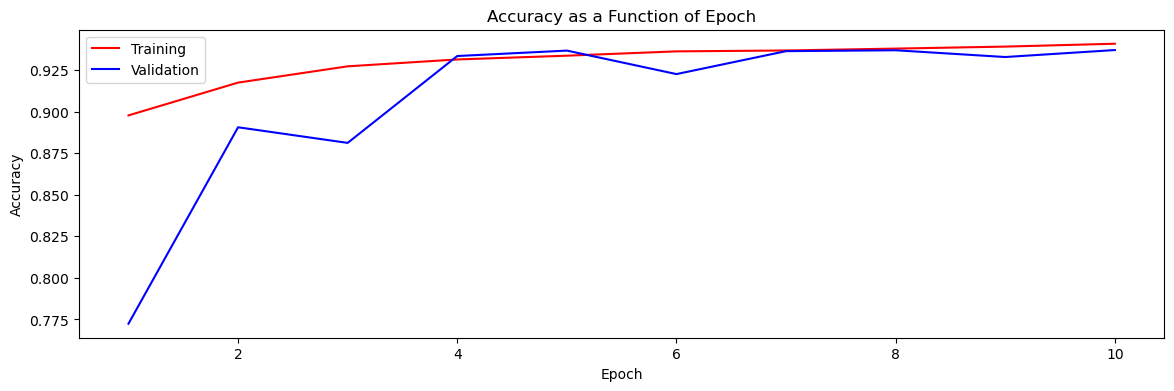

In [410]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Training')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

Assess the performance of the model on the validation data set

In [411]:
# Compute the final accuracy of the model on the validation data set using the 'evaluate()' method
performance_test = nn1.evaluate(X_test, y_test)

print('The loss value of the model on the validation data is {}'.format(performance_test[0]))
print('The accuracy of the model on the validation data is {}'.format(performance_test[1]))

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9402 - loss: 0.2059
The loss value of the model on the validation data is 0.21592681109905243
The accuracy of the model on the validation data is 0.9370666742324829


Find the optimal parameters using GridSearchCV

In [412]:
from scikeras.wrappers import KerasClassifier

In [414]:
# Initialize a basic NN object using the 'KerasClassifier()' method
# Set the 'build_fn' parameter to 'create_nn' - This converts the 'create_nn' function into a 'KerasClassifier' object
base_grid_model = KerasClassifier(build_fn=create_nn,  verbose=0)

# Define a list of 'activation_function' and 'hidden1_neurons' parameters and store it in a parameter grid dictionary
parameters_grid = {
    'model__activation_function': ['relu', 'sigmoid'],
    'model__hidden1_neurons': [1, 5],
    'epochs': [10],
    'batch_size': [32]
}
# Perform a grid search using the 'GridSearchCV()' method to obtain a grid on which to fit the training data
# Note: Set the 'estimator' parameter to 'base_grid_model' - This specifies the estimator to be used by 'GridSearchCV()'
# Note: Set the 'param_grid' parameter to 'parameters_grid' - This specifies the grid of parameters to search over
# Note: Set the 'cv' parameter to 2 - This specifies the number of folds in the cross-validation process
# Note: Set the 'verbose' parameter to 4 - This helps show more relevant information during training
grid = GridSearchCV(estimator=base_grid_model, param_grid=parameters_grid, cv=2, verbose=4)

# Train the model on the training data using the 'fit()' method
# Note: Use the default batch size or set it to 32
# Note: Set the 'epochs' parameter to 10
# Note: The 'validation_split' parameter isn't particularly required since cross-validation is already in place
grid_model = grid.fit(X_train, y_train )

# Print the optimal values of 'activation_function' and 'hidden1_neurons'
best_activation_function = grid_model.best_params_['model__activation_function']
best_hidden1_neurons = grid_model.best_params_['model__hidden1_neurons']
best_accuracy = grid_model.best_score_


print('\n The optimal value of convolution filter size is', best_activation_function)
print('\nThe optimal value of hidden1_neurons is', best_hidden1_neurons)
print('\n The accuracy of the model with these optimal parameters is ', best_accuracy)


Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END batch_size=32, epochs=10, model__activation_function=relu, model__hidden1_neurons=1;, score=0.919 total time=   8.3s
[CV 2/2] END batch_size=32, epochs=10, model__activation_function=relu, model__hidden1_neurons=1;, score=0.919 total time=   9.1s
[CV 1/2] END batch_size=32, epochs=10, model__activation_function=relu, model__hidden1_neurons=5;, score=0.919 total time=   7.2s
[CV 2/2] END batch_size=32, epochs=10, model__activation_function=relu, model__hidden1_neurons=5;, score=0.919 total time=   6.9s
[CV 1/2] END batch_size=32, epochs=10, model__activation_function=sigmoid, model__hidden1_neurons=1;, score=0.919 total time=   7.3s
[CV 2/2] END batch_size=32, epochs=10, model__activation_function=sigmoid, model__hidden1_neurons=1;, score=0.919 total time=   7.6s
[CV 1/2] END batch_size=32, epochs=10, model__activation_function=sigmoid, model__hidden1_neurons=5;, score=0.932 total time=   7.8s
[CV 2/2] END batch_siz

Retrain the model with the optimal combination of hyperparameters and save its training history

In [415]:
# Use the 'create_nn' function to create a NN with the optimal values of 'filter_size' and 'pool_filter_size'
# Note: Set the 'activation_function' parameter to 'best_activation_function' - This specifies the optimal value for the 'activation_function' parameter
# Note: Set the 'hidden1_neurons' parameter to 'best_hidden1_neurons' - This specifies the optimal value for the 'hidden1_neurons' parameter
nn1 = create_nn(activation_function='sigmoid', hidden1_neurons=5)

# Capture the training history of the model using the 'fit()' method
# Note: Set the 'validation_data' parameter to (X_val, y_val)
# Note: Use the default batch size or set it to 32
# Note: Set the 'epochs' parameter to 10
nn1.summary()
print('\n')
nn1_history = nn1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)
hist = pd.DataFrame(nn1_history.history)
hist['epoch'] = nn1_history.epoch

Model: "sequential_108"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_402 (Dense)               │ (None, 5)              │           865 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_403 (Dense)               │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_404 (Dense)               │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_405 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,344 (5.25 KB)

 Trainable params: 1,344 (5.25 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9127 - loss: 0.3330 - val_accuracy: 0.9187 - val_loss: 0.2815
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9174 - loss: 0.2838 - val_accuracy: 0.9187 - val_loss: 0.2789
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9178 - loss: 0.2775 - val_accuracy: 0.9187 - val_loss: 0.2718
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9189 - loss: 0.2683 - val_accuracy: 0.9187 - val_loss: 0.2639
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9228 - loss: 0.2513 - val_accuracy: 0.9187 - val_loss: 0.2471
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9223 - loss: 0.2344 - val_accuracy: 0.9214 - val_loss: 0.2517
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9275 - loss: 0.2350 - val_accuracy: 0.9209 - val_loss: 0.2408
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9239 - loss: 0.2310 - val_accuracy: 

Plot the training and validation accuracies for different values of epoch

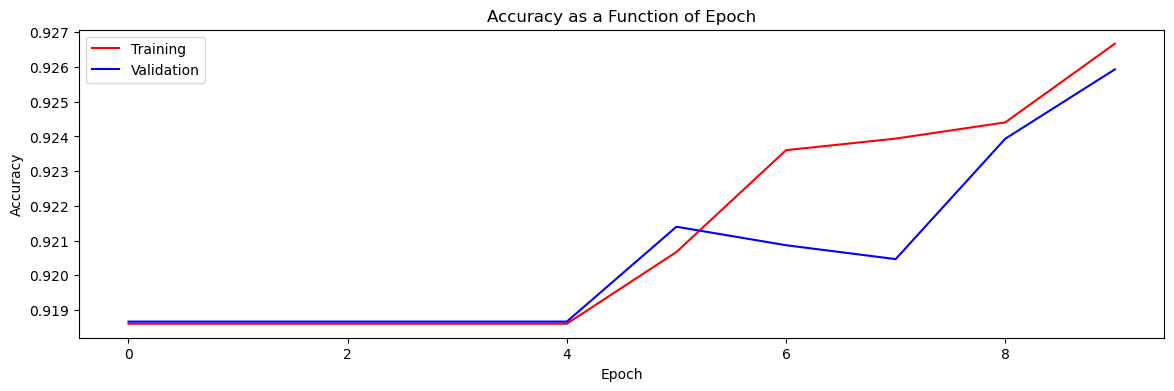

In [416]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Training')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

Evaluate the performance of the model on the testing data

In [418]:
# Compute the accuracy of the model on the testing data set using the 'evaluate()' method
performance_test = nn1.evaluate(X_test, y_test)

print('The loss value of the model on the test data is {}'.format(performance_test[0]))
print('The accuracy of the model on the test data is {}'.format(performance_test[1]))

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9307 - loss: 0.2114
The loss value of the model on the test data is 0.22178906202316284
The accuracy of the model on the test data is 0.9259333610534668


### Find the optimal parameters using RandomizedSearchCV

Randomized search cross-validation is a technique used for hyperparameter optimization in machine learning models. It is an alternative to grid search, which exhaustively searches through all possible combinations of hyperparameters.

In randomized search cross-validation, instead of trying every combination, a fixed number of random combinations of hyperparameters are sampled from a predefined search space. This approach allows for a more efficient exploration of the hyperparameter space, especially when the search space is large.


You can understand about its implementation [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

In [420]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution for randomized search
parameters_dist = {
    'model__activation_function': ['relu', 'sigmoid'],
    'model__hidden1_neurons': randint(256, 513),  # Range of values for hidden1_neurons
}
# Initialize a basic NN object using the 'KerasClassifier()' method
base_random_model = KerasClassifier(build_fn=create_nn, verbose=0)

# Perform randomized search using the 'RandomizedSearchCV()' method

# Note: Set the 'estimator' parameter to 'base_random_model' - This specifies the estimator to be used by 'RandomizedSearchCV()'
# Note: Set the 'param_distributions' parameter to 'parameters_dist' - This specifies the parameters to search over
# Note: Set the 'cv' parameter to 2 - This specifies the number of folds in the cross-validation process
# Note: Set the 'n_iter' parameter to 2 - This specifies the number of parameter settings that are sampled
# Note: Set the 'verbose' parameter to 4 - This helps show more relevant information during training
# Note: Set the 'random_state' parameter to 0 - This helps generate the consistent results across multiple runs
randomized_search = RandomizedSearchCV(estimator=base_random_model,
    param_distributions=parameters_dist,
    n_iter=2,  # Number of parameter settings to sample
    cv=2,  # Number of cross-validation folds
    verbose=4,
    random_state=0
)

# Train the model on the training data using the 'fit()' method
# Note: Set the 'epochs' parameter to 10
randomized_model = randomized_search.fit(X_train, y_train)

# Print the optimal values of 'activation_function' and 'hidden1_neurons'
best_activation_function = randomized_model.best_params_['model__activation_function']
best_hidden1_neurons = randomized_model.best_params_['model__hidden1_neurons']
best_accuracy = randomized_model.best_score_

print('\nThe optimal value of activation function is', best_activation_function)
print('\nThe optimal value of hidden1_neurons is', best_hidden1_neurons)
print('\nThe accuracy of the model with these optimal parameters is', best_accuracy)


Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 1/2] END model__activation_function=relu, model__hidden1_neurons=303;, score=0.927 total time=   3.2s
[CV 2/2] END model__activation_function=relu, model__hidden1_neurons=303;, score=0.922 total time=   3.5s
[CV 1/2] END model__activation_function=sigmoid, model__hidden1_neurons=448;, score=0.922 total time=   3.5s
[CV 2/2] END model__activation_function=sigmoid, model__hidden1_neurons=448;, score=0.908 total time=   4.2s

The optimal value of activation function is relu

The optimal value of hidden1_neurons is 303

The accuracy of the model with these optimal parameters is 0.9246715371283829


Retrain the model on the optimal set of hyperparameters

In [421]:
# Use the 'create_nn' function to create a NN with the optimal values of 'filter_size' and 'pool_filter_size'
# Note: Set the 'activation_function' parameter to 'best_activation_function' - This specifies the optimal value for the 'activation_function' parameter
# Note: Set the 'hidden1_neurons' parameter to 'best_hidden1_neurons' - This specifies the optimal value for the 'hidden1_neurons' parameter
nn2 = create_nn(activation_function='relu', hidden1_neurons=303)

# Capture the training history of the model using the 'fit()' method
# Note: Set the 'validation_data' parameter to (X_val, y_val)
# Note: Use the default batch size or set it to 32
# Note: Set the 'epochs' parameter to 10
nn2.summary()
print('\n')
nn2_history = nn2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)
hist = pd.DataFrame(nn2_history.history)
hist['epoch'] = nn2_history.epoch

Model: "sequential_118"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_442 (Dense)               │ (None, 303)            │        52,419 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_443 (Dense)               │ (None, 303)            │        92,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_444 (Dense)               │ (None, 64)             │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_445 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,052 (640.83 KB)

 Trainable params: 164,052 (640.83 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8890 - loss: 6.8455 - val_accuracy: 0.9272 - val_loss: 0.2217
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9290 - loss: 0.2466 - val_accuracy: 0.9346 - val_loss: 0.2064
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9371 - loss: 0.2693 - val_accuracy: 0.9360 - val_loss: 0.2496
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9337 - loss: 0.2310 - val_accuracy: 0.9395 - val_loss: 0.2182
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9371 - loss: 0.2455 - val_accuracy: 0.9325 - val_loss: 0.1949
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9418 - loss: 0.2343 - val_accuracy: 0.9394 - val_loss: 0.2003
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9308 - loss: 0.2444 - val_accuracy: 0.9339 - val_loss: 0.2117
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9400 - loss: 0.2464 - val_accuracy: 

Plot the training and validation accuracies for different values of epoch

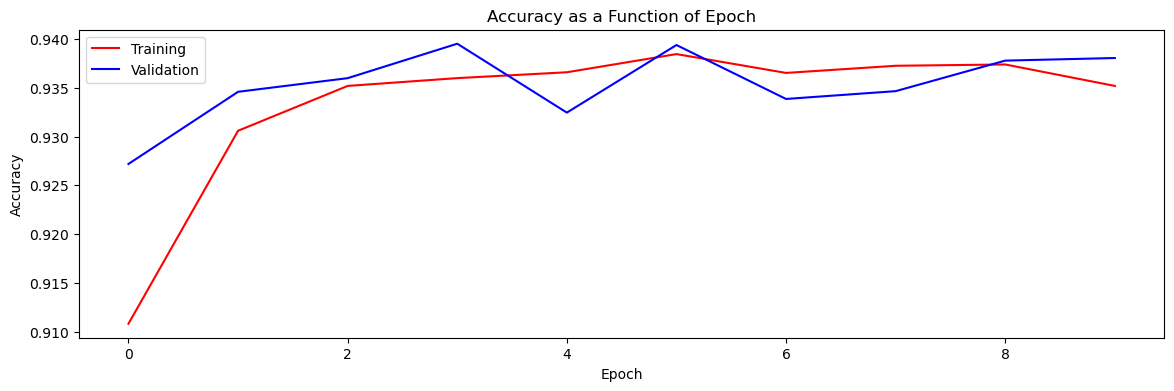

In [422]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Training')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

Evaluate the performance of the model on the testing data

In [423]:
# Compute the accuracy of the model on the testing data set using the 'evaluate()' method
performance_test = nn2.evaluate(X_test, y_test)

print('The loss value of the model on the test data is {}'.format(performance_test[0]))
print('The accuracy of the model on the test data is {}'.format(performance_test[1]))

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9420 - loss: 0.2040
The loss value of the model on the test data is 0.2122894674539566
The accuracy of the model on the test data is 0.9380666613578796


**Checklist:**
- Importing necessary libraries for machine learning and deep learning
- Preprocessed the data
- Divided the data set into train and test splits
- Handled class imbalance using random undersampling and random oversampling
- Built and evaluated different machine learning models such as logistic regression, decision trees, KNN and random forest models with and without treating class imbalance
- Tuned the best machine learning using GridSearchCV for the optimal hyperparameters
- Built and evaluated a neural network model and tuned for its hyperparameters using GridSearchCV and RandomizedSearchCV

## Task 6: Business Insights: Misclassification Costs
Our first step is to understand the current profitability of the telecomminucation service program, and then to is to estimate the impact of our model. We are going to use misclassification costs to study the impact.

We are going to use \$500 as an approximation company loss for the false negative cost, and \$300 company loss for the false positive cost. Note: We are interested in finding the best cut-off that will maximize the benefit of our machine learning model.


In [431]:
# Define the false positive and false negative missclassification cost here

fn_cost = 500
fp_cost = 300

#### We will use the optimal model and its corresponding data set that was implemented in the GridSearchCV section. Let's first see the performance metrics of the trained model.

In [438]:
# Use the most optimal machine learning model that you obtained from the GridSearchCV section and the corresponding data set you used (normal, RUS or ROS)
best_model = DecisionTreeClassifier( max_depth = 40 , random_state = 0)
best_model.fit(X_train_ros, y_train_ros)

# Evaluating the accuracy of the training and validation sets
tree_train_acc = best_model.score(X_train_ros, y_train_ros)
tree_val_acc = best_model.score(X_test_ros, y_test_ros)

# Calculate the F1 score, Precision and Recall on the validation set
y_pred_train = best_model.predict(X_train_ros)
y_pred_test = best_model.predict(X_test_ros)
f_score = f1_score(y_test_ros, y_pred_test, average = 'weighted')
precision = precision_score(y_test_ros, y_pred_test)
recall = metrics.recall_score(y_test_ros, y_pred_test)

model_name =  'Decision Tree - Random Oversampling'
# creating a dataframe to compare the performance of different models
new_model_eval_data = [[model_name, tree_train_acc, tree_val_acc, f_score, precision, recall]]
new_evaluate_df = pd.DataFrame(new_model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score',
                                          'F1 Score', 'Precision', 'Recall'])

DecisionTreeClassifier(max_depth=40, random_state=0)

In [439]:
new_evaluate_df

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall
0,Decision Tree - Random Oversampling,0.997823,0.973694,0.973676,0.950017,1.0


#### We now calculate the current misclassification cost in the validation set.

In [440]:
# Obtain the count of false positive and false negative classifications from your model
cf = confusion_matrix(y_test_ros, y_pred_test)

fp_count = cf[0,1]
fn_count = cf[1,0]

# Calculate the total misclassification cost using the FN and FP cost and FN and FP count
misclassification_cost = fp_count * fp_cost + fn_count * fn_cost 

print('Number of False Positives: %d' % fp_count)
print('Number of False Negatives: %d' % fn_count)
print('Prediction Misclassification Cost: %.2f' % misclassification_cost)

Number of False Positives: 145
Number of False Negatives: 0
Prediction Misclassification Cost: 43500.00


#### We now calculate the misclassification cost as we raise the cut-off value from 0 to 1.

In [443]:
# Predict probabilities for the training set and retain them for only positive outcomes
lr_probs_train = best_model.predict_proba(X_train_ros)[:, 1]

# Predict probabilities for the validation set and retain them for only positive outcomes
lr_probs_test = best_model.predict_proba(X_test_ros)[:, 1]


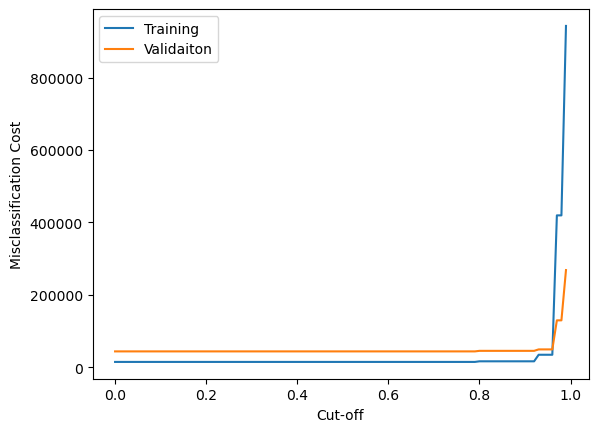

Best Misclassification Cost on the training is 14400.00 at Cut-off 0.000
Applying that cut-off to the validation data results in Misclassification Cost of 43500.00 


In [444]:
# Calculate and store the misclassification costs for different values of cut-off probability
cost_train = []
cost_val=[]

for cutoff in np.arange(0, 1, 0.01):
    # Get the classification predictions using the probabilities obtained for the training data set and the cutoff
    # Get the false positive and false negative count from the predictions
    # Calculate the training misclassification cost and append it to the cost_train array
    curr_preds = np.where(lr_probs_train > cutoff ,1 , 0)
    curr_cf = confusion_matrix(y_train_ros, curr_preds)
    curr_fp_count = curr_cf[0,1]
    curr_fn_count = curr_cf[1,0]
    
    curr_misclassification_cost = curr_fp_count * fp_cost + curr_fn_count * fn_cost
    cost_train.append(curr_misclassification_cost)

    # Get the classification predictions using the probabilities obtained for the validation data set and the cutoff
    # Get the false positive and false negative count from the predictions
    # Calculate the training misclassification cost and append it to the cost_val array
    curr_preds = np.where(lr_probs_test > cutoff , 1, 0)
    curr_cf = confusion_matrix(y_test_ros, curr_preds)
    curr_fp_count = curr_cf[0,1]
    curr_fn_count = curr_cf[1,0]
    
    curr_misclassification_cost = curr_fp_count * fp_cost + curr_fn_count * fn_cost
    cost_val.append(curr_misclassification_cost)


# Get the X values (cut-off values)
cutoffs = np.arange(0, 1, 0.01)

# Plot misclassification cost against cut-off value
plt.plot(cutoffs,cost_train, label='Training')
plt.plot(cutoffs,cost_val, label='Validaiton')
plt.xlabel('Cut-off')
plt.ylabel('Misclassification Cost')
plt.legend()
plt.show()

# Find the minimum misclassification cost and its associated cut-off value based on the training data
best_cost = min(cost_train)
best_cutoff = cutoffs[cost_train.index(best_cost)]

#apply the cut-off value to the validation data
best_valcost = cost_val[cost_train.index(best_cost)]


print('Best Misclassification Cost on the training is %.2f at Cut-off %.3f' % (best_cost, best_cutoff));
print('Applying that cut-off to the validation data results in Misclassification Cost of %.2f ' % best_valcost);

Checklist:
 - Chose the optimal model and calculated the current misclassification cost in the validation set
 - Calculated the misclassification cost for different values of cut-off value from 0 to 1
 - Found the minimum misclassification cost and its associated best cut-off value based on the training data
 - Applyied the same cut-off to the validation data